In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('dataset_world_happiness.csv')
print(dataset.isnull().sum())

# break up data by years
def separateYears(data,year):
    if(year>2015):
        return data.loc[data['Year']==year].reset_index()
    else:
        return data.loc[data['Year']==year]

Country                          303
Region                           150
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           303
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                303
Year                               0
dtype: int64


In [376]:
# 2015
dataset_2015 = separateYears(dataset, 2015) 
dataset_2015.pop('Year')
print(dataset_2015.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
GDP Per Capita                   0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [377]:
# 2016
dataset_2016 = separateYears(dataset,2016)
dataset_2016.drop('index', inplace=True, axis=1)
dataset_2016.pop('Year')
print(dataset_2016.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
GDP Per Capita                   0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [378]:
# 2017
dataset_2017 = separateYears(dataset,2017)
dataset_2017.drop('index', inplace=True, axis=1)
dataset_2017.pop('Year')
print(dataset_2017.isnull().sum())

Country                            0
Region                           150
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
dtype: int64


In [379]:
#2018
dataset_2018 = separateYears(dataset,2018)
dataset_2018.pop('Year')
dataset_2018.drop('index', inplace=True, axis=1)
print("Before")
print(dataset_2018.isnull().sum())
dataset_2018.Country.fillna(dataset_2018.Region, inplace=True)
print("\nAfter")
print(dataset_2018.isnull().sum())

Before
Country                          149
Region                             0
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           149
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                149
dtype: int64

After
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           149
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                149
dtype: int64


In [380]:
# 2019
dataset_2019 = separateYears(dataset,2019)
dataset_2019.drop('index', inplace=True, axis=1)
dataset_2019.pop('Year')
print("Before")
print(dataset_2019.isnull().sum())
dataset_2019.Country.fillna(dataset_2019.Region, inplace=True)
print("\nAfter")
print(dataset_2019.isnull().sum())

Before
Country                          154
Region                             0
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           154
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                154
dtype: int64

After
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           154
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                154
dtype: int64


In [381]:
# Merging 2015 and 2016 (Call temp)
temp = pd.merge(dataset_2015, dataset_2016, on = 'Country')
temp.rename(columns = {'Region_x' : 'Region',
                      'Happiness Rank_x' : 'Happiness Rank_2015',
                      'Happiness Score_x' : 'Happiness Score_2015',
                      'GDP Per Capita_x':'GDP Per Capita_2015',
                      'Family_x':'Family_2015',
                      'Health (Life Expectancy)_x':'Health (Life Expectancy)_2015',
                      'Freedom_x':'Freedom_2015',
                      'Trust (Government Corruption)_x':'Trust (Government Corruption)_2015',
                      'Generosity_x':'Generosity_2015',
                      'Dystopia Residual_x':'Dystopia Residual_2015',
                      'Region_y' : 'Region_2016',
                      'Happiness Rank_y' : 'Happiness Rank_2016',
                      'Happiness Score_y' : 'Happiness Score_2016',
                      'GDP Per Capita_y':'GDP Per Capita_2016',
                      'Family_y':'Family_2016',
                      'Health (Life Expectancy)_y':'Health (Life Expectancy)_2016',
                      'Freedom_y':'Freedom_2016',
                      'Trust (Government Corruption)_y':'Trust (Government Corruption)_2016',
                      'Generosity_y':'Generosity_2016',
                      'Dystopia Residual_y':'Dystopia Residual_2016'}, inplace = True)

In [382]:
# Merging 2015,2016 with 2017
temp2 = pd.merge(temp, dataset_2017,on = 'Country')
temp2.drop('Region_y', inplace =True, axis =1)

In [383]:
# Merging 2015-2017 with 2018
temp3 = pd.merge(temp2, dataset_2018,on = 'Country')
temp3.drop('Region', inplace =True, axis =1)
temp3.drop('Region_2016', inplace =True, axis =1)
temp3.rename(columns = {'Happiness Rank_x' : 'Happiness Rank_2017',
                      'Happiness Score_x' : 'Happiness Score_2017',
                      'GDP Per Capita_x':'GDP Per Capita_2017',
                      'Family_x':'Family_2017',
                      'Health (Life Expectancy)_x':'Health (Life Expectancy)_2017',
                      'Freedom_x':'Freedom_2017',
                      'Trust (Government Corruption)_x':'Trust (Government Corruption)_2017',
                      'Generosity_x':'Generosity_2017',
                      'Dystopia Residual_x':'Dystopia Residual_2017',
                      'Happiness Rank_y' : 'Happiness Rank_2018',
                      'Happiness Score_y' : 'Happiness Score_2018',
                      'GDP Per Capita_y':'GDP Per Capita_2018',
                      'Family_y':'Family_2018',
                      'Health (Life Expectancy)_y':'Health (Life Expectancy)_2018',
                      'Freedom_y':'Freedom_2018',
                      'Trust (Government Corruption)_y':'Trust (Government Corruption)_2018',
                      'Generosity_y':'Generosity_2018',
                      'Dystopia Residual_y':'Dystopia Residual_2018'}, inplace = True)

In [384]:
# Merging 2015-2018 with 2019
newData = pd.merge(temp3,dataset_2019,on = 'Country')
newData.drop('Region', inplace =True, axis =1)
newData.rename(columns = {'Happiness Rank_x' : 'Happiness Rank_2018',
                      'Happiness Score_x' : 'Happiness Score_2018',
                      'GDP Per Capita_x':'GDP Per Capita_2018',
                      'Family_x':'Family_2018',
                      'Health (Life Expectancy)_x':'Health (Life Expectancy)_2018',
                      'Freedom_x':'Freedom_2017',
                      'Trust (Government Corruption)_x':'Trust (Government Corruption)_2018',
                      'Generosity_x':'Generosity_2018',
                      'Dystopia Residual_x':'Dystopia Residual_2018',
                      'Happiness Rank' : 'Happiness Rank_2019',
                      'Happiness Score' : 'Happiness Score_2019',
                      'GDP Per Capita':'GDP Per Capita_2019',
                      'Family':'Family_2019',
                      'Health (Life Expectancy)':'Health (Life Expectancy)_2019',
                      'Freedom':'Freedom_2019',
                      'Trust (Government Corruption)':'Trust (Government Corruption)_2019',
                      'Generosity':'Generosity_2019',
                      'Dystopia Residual':'Dystopia Residual_2019',
                       'Region_x':'Region'}, inplace = True)

In [385]:
# Filling in the NaN with the averages of previous years
newData['Family_2018'] = newData[['Family_2015', 'Family_2016','Family_2017']].mean(axis=1)
newData['Family_2019'] = newData[['Family_2015', 'Family_2016','Family_2017','Family_2018']].mean(axis=1)
newData['Dystopia Residual_2018'] = newData[['Dystopia Residual_2015', 'Dystopia Residual_2016','Dystopia Residual_2017']].mean(axis=1)
newData['Dystopia Residual_2019'] = newData[['Dystopia Residual_2015', 'Dystopia Residual_2016','Dystopia Residual_2017','Dystopia Residual_2018']].mean(axis=1)

In [386]:
# Filling in the NaN in Trust by averaging the previous years
newData = newData.sort_values('Region')
uae = newData.loc[newData['Country']=='United Arab Emirates']
avg_uae=uae[['Trust (Government Corruption)_2015','Trust (Government Corruption)_2016','Trust (Government Corruption)_2017','Trust (Government Corruption)_2019']].mean(axis=1)
newData.loc[17,'Trust (Government Corruption)_2018']=avg_uae.loc[17]
newData.to_csv('data.csv')
print(newData.isnull().sum())

Country                               0
Region                                0
Happiness Rank_2015                   0
Happiness Score_2015                  0
GDP Per Capita_2015                   0
Family_2015                           0
Health (Life Expectancy)_2015         0
Freedom_2015                          0
Trust (Government Corruption)_2015    0
Generosity_2015                       0
Dystopia Residual_2015                0
Happiness Rank_2016                   0
Happiness Score_2016                  0
GDP Per Capita_2016                   0
Family_2016                           0
Health (Life Expectancy)_2016         0
Freedom_2016                          0
Trust (Government Corruption)_2016    0
Generosity_2016                       0
Dystopia Residual_2016                0
Happiness Rank_2017                   0
Happiness Score_2017                  0
GDP Per Capita_2017                   0
Family_2017                           0
Health (Life Expectancy)_2017         0


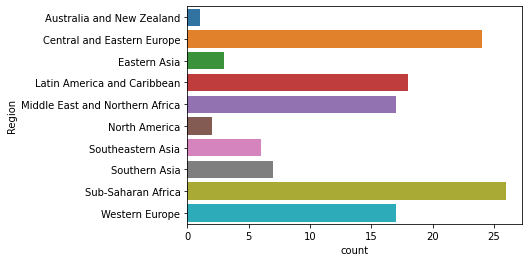

In [387]:
sns.countplot(y=newData['Region'])
plt.show()
region = newData.sort_values('Region')

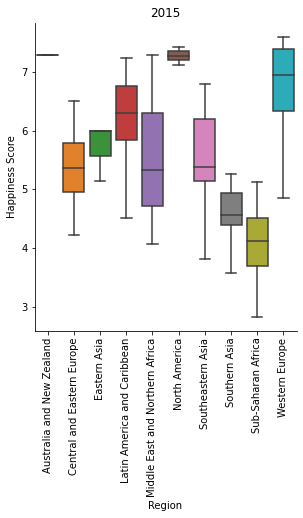

In [388]:
g = sns.catplot(x ='Region', y='Happiness Score_2015', sym = '',data = newData, kind = 'box')
plt.xticks(rotation = 90) 
plt.title('2015')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

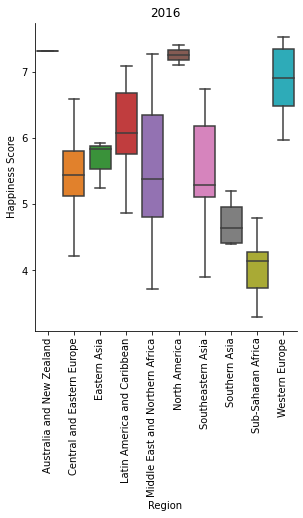

In [389]:
g = sns.catplot(x ='Region', y='Happiness Score_2016', sym = '',data = newData, kind = 'box')
plt.xticks(rotation = 90) 
plt.title('2016')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

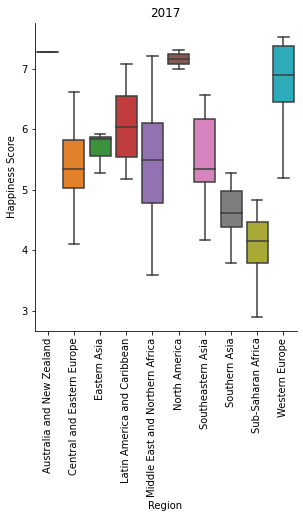

In [390]:
g = sns.catplot(x ='Region', y='Happiness Score_2017', sym = '',data = newData, kind = 'box')
plt.xticks(rotation = 90) 
plt.title('2017')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

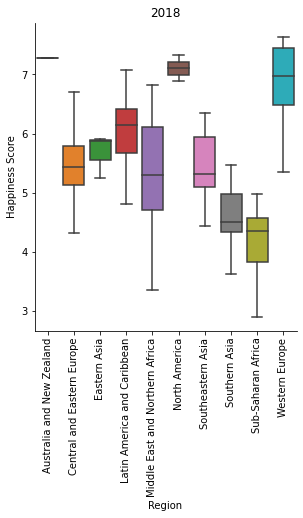

In [391]:
g = sns.catplot(x ='Region', y='Happiness Score_2018', sym = '',data = newData, kind = 'box')
plt.xticks(rotation = 90) 
plt.title('2018')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

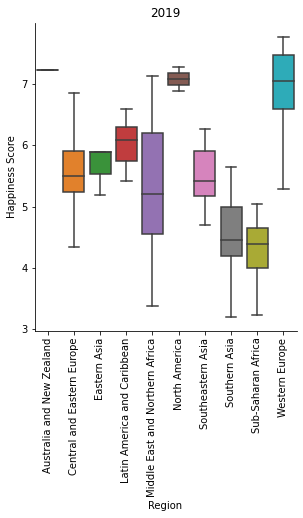

In [392]:
g = sns.catplot(x ='Region', y='Happiness Score_2019', sym = '',data = newData, kind = 'box')
plt.xticks(rotation = 90) 
plt.title('2019')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

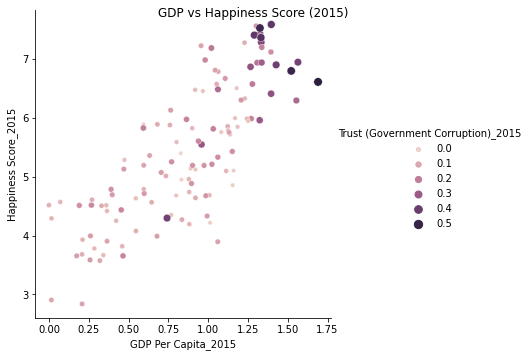

In [393]:
# 
rel = sns.relplot(x="GDP Per Capita_2015", y="Happiness Score_2015", 
            data=newData, kind="scatter", 
            size="Trust (Government Corruption)_2015",hue = 'Trust (Government Corruption)_2015')
rel.fig.suptitle('GDP vs Happiness Score (2015)')
plt.show()

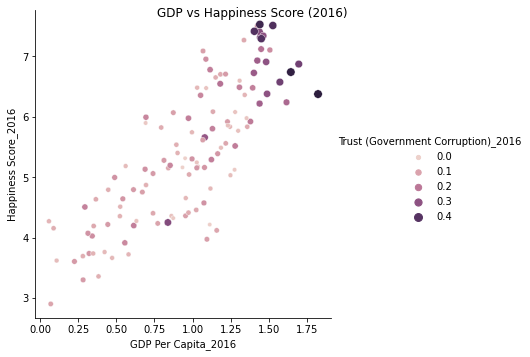

In [394]:
rel = sns.relplot(x="GDP Per Capita_2016", y="Happiness Score_2016", 
            data=newData, kind="scatter", 
            size="Trust (Government Corruption)_2016",hue = 'Trust (Government Corruption)_2016')
rel.fig.suptitle('GDP vs Happiness Score (2016)')
plt.show()

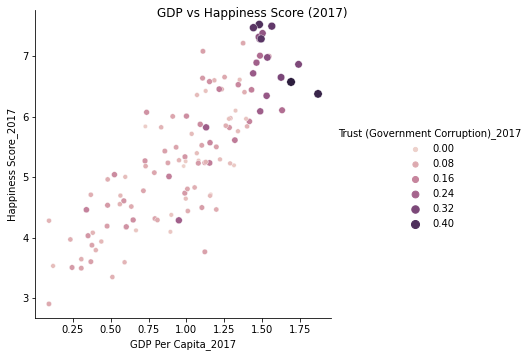

In [395]:
rel = sns.relplot(x="GDP Per Capita_2017", y="Happiness Score_2017", 
            data=newData, kind="scatter", 
            size="Trust (Government Corruption)_2017",hue = 'Trust (Government Corruption)_2017')
rel.fig.suptitle('GDP vs Happiness Score (2017)')
plt.show()

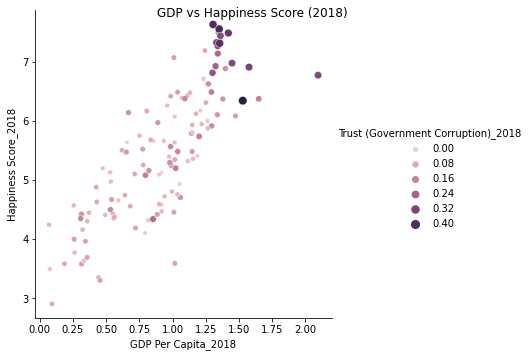

In [396]:
rel = sns.relplot(x="GDP Per Capita_2018", y="Happiness Score_2018", 
            data=newData, kind="scatter", 
            size="Trust (Government Corruption)_2018",hue = 'Trust (Government Corruption)_2018')
rel.fig.suptitle('GDP vs Happiness Score (2018)')
plt.show()

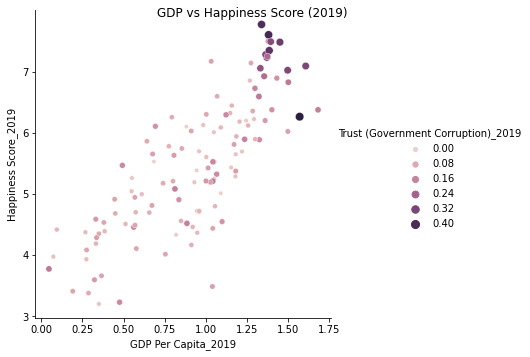

In [397]:
rel = sns.relplot(x="GDP Per Capita_2019", y="Happiness Score_2019", 
            data=newData, kind="scatter", 
            size="Trust (Government Corruption)_2019",hue = 'Trust (Government Corruption)_2019')
rel.fig.suptitle('GDP vs Happiness Score (2019)')
plt.show()

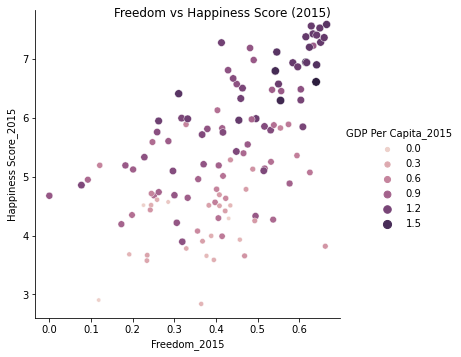

In [398]:
rel = sns.relplot(x="Freedom_2015", y="Happiness Score_2015", 
            data=newData, kind="scatter", 
            size="GDP Per Capita_2015",hue = 'GDP Per Capita_2015')
rel.fig.suptitle('Freedom vs Happiness Score (2015)')
plt.show()

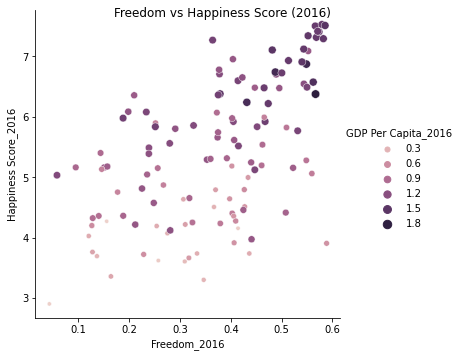

In [399]:
rel = sns.relplot(x="Freedom_2016", y="Happiness Score_2016", 
            data=newData, kind="scatter", 
            size="GDP Per Capita_2016",hue = 'GDP Per Capita_2016')
rel.fig.suptitle('Freedom vs Happiness Score (2016)')
plt.show()

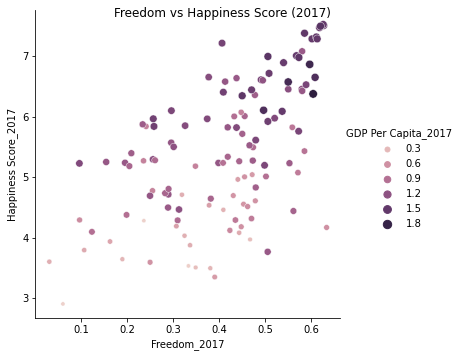

In [400]:
rel = sns.relplot(x="Freedom_2017", y="Happiness Score_2017", 
            data=newData, kind="scatter", 
            size="GDP Per Capita_2017",hue = 'GDP Per Capita_2017')
rel.fig.suptitle('Freedom vs Happiness Score (2017)')
plt.show()

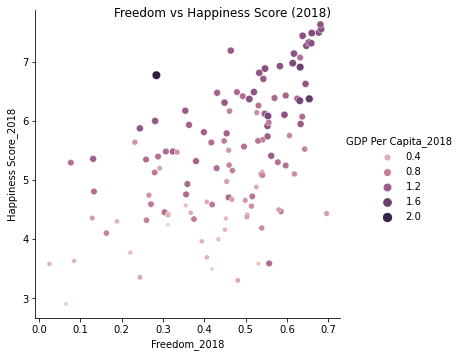

In [401]:
rel = sns.relplot(x="Freedom_2018", y="Happiness Score_2018", 
            data=newData, kind="scatter", 
            size="GDP Per Capita_2018",hue = 'GDP Per Capita_2018')
rel.fig.suptitle('Freedom vs Happiness Score (2018)')
plt.show()

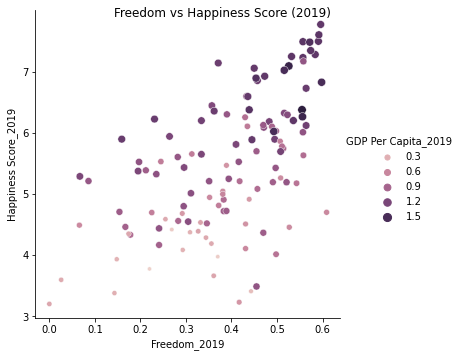

In [402]:
rel = sns.relplot(x="Freedom_2019", y="Happiness Score_2019", 
            data=newData, kind="scatter", 
            size="GDP Per Capita_2019",hue = 'GDP Per Capita_2019')
rel.fig.suptitle('Freedom vs Happiness Score (2019)')
plt.show()

In [403]:
#Read dataset
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


BigData = pd.read_csv('data.csv')
Data15 = BigData.copy(deep=True)

# Remove all columns between column index 1 to 3
Data15.drop(Data15.iloc[:, 0:4], inplace = True, axis = 1)
Data15.drop(Data15.iloc[:, 7: ], inplace = True, axis = 1)


#print(Data15.describe())

#This tells us what is Data15
#type(Data15)


X = Data15.copy(deep=True)
y = Data15.copy(deep=True)

X.drop(X.iloc[:,0:1], inplace = True, axis = 1)
y.drop(y.iloc[:, 1:7], inplace = True, axis = 1)
#print(y)
#print(X)
            #We are going to attempt Linear Regression(3 tabs)
    #Split the Data in train and test(1)
    
#X = Data15.iloc[:, 1:7].values
#y = Data15.iloc[:, 0].values

#Get x and y dataframe
#print(x)
#print(y)
#print(type(X))
# split into the two subsets using random selection


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 

#  #create linear regression object
# lr = LinearRegression()
# # train the model using the training set
# lr.fit(X_train, y_train)
# lr.score(X_train, y_train)


# # Model
# print('Coefficient:', lr.score(X_train, y_train))
# print('Intercept:', lr.intercept_)
# print('Slope:', lr.coef_)

# coefficients = zip(X.columns, lr.coef_)
# coefficients = pd.DataFrame(list(zip(X.columns, lr.coef_))
#                             , columns = ['Features', 'Coefficients'])
# coefficients.sort_values('Coefficients', ascending = False)

# # make predictions using testset
# y_pred = lr.predict(X_test)


# pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}).head(25)
# pred.head(10)

       
#Trying a different way
    
# from sklearn.linear_model 
# model = LinearRegression().fit(X, y)


# r_sq = model.score(x, y)
# print('coefficient of determination:', r_sq)
# print('intercept:', model.intercept_)
# print('slope:', model.coef_)
# y_pred = model.predict(x)
# print('predicted response:', y_pred, sep='\n')
#             #This works
    
            #Trying training and test 
 
            
    
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)


r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')
            #This works

    
#Now using polynomial Regression



coefficient of determination: 0.8117660275565675
intercept: [1.94521981]
slope: [[0.76344513 1.32614017 1.53936914 0.24443903 1.72465257 0.81065847]]
predicted response:
[[5.94248887]
 [4.80188502]
 [5.99140333]
 [6.80998719]
 [6.62769323]
 [6.72294264]
 [3.57879736]
 [4.97749905]
 [6.18491014]
 [7.28495853]
 [5.42400711]
 [7.21452387]
 [5.91918411]
 [5.96576444]
 [4.94743284]
 [5.4595396 ]
 [7.20084457]
 [7.26051414]
 [4.63228081]
 [7.00943718]
 [6.15605108]
 [5.79026156]
 [4.46253307]
 [7.27144752]
 [6.36774731]
 [5.38742373]
 [5.55120031]
 [6.76082034]
 [5.66661997]
 [4.39347057]
 [5.24448677]
 [4.69421905]
 [5.69252749]
 [3.94799698]
 [5.538977  ]
 [6.46808711]
 [5.82458924]
 [5.09390138]
 [7.17765226]
 [5.62641523]]


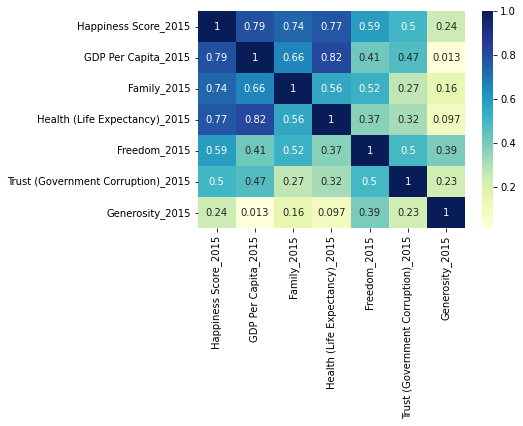

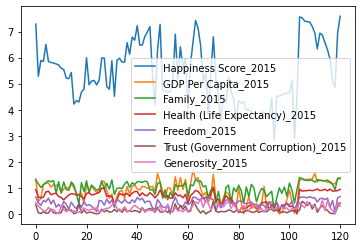

In [404]:
#Plotting graph
import seaborn as sns
import matplotlib.pyplot as plt


dataplot = sns.heatmap(Data15.corr(), cmap="YlGnBu", annot=True)

Data15.plot(kind='line')


plt.show()

In [405]:
#Read dataset

Data16 = BigData.copy(deep=True)

# Remove all columns between column index 1 to 3
Data16.drop(Data16.iloc[:, 0:13], inplace = True, axis = 1)
Data16.drop(Data16.iloc[:, 8: ], inplace = True, axis = 1)

#print(Data16)





X = Data16.copy(deep=True)
y = Data16.copy(deep=True)

X.drop(X.iloc[:,0:1], inplace = True, axis = 1)
y.drop(y.iloc[:, 1:8], inplace = True, axis = 1)
#print(y)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 


    
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)


r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9999999351020245
intercept: [0.00018095]
slope: [[0.99994633 1.0000685  0.99976653 1.00007503 0.99981415 1.00015391
  0.99995567]]
predicted response:
[[6.95199319]
 [4.36161929]
 [6.59618904]
 [6.57323457]
 [5.9209614 ]
 [7.10362071]
 [3.35983961]
 [5.40136889]
 [7.08662374]
 [7.29128714]
 [4.32448775]
 [6.37444877]
 [5.65771305]
 [6.65006575]
 [4.12150572]
 [5.03269107]
 [6.87106808]
 [7.312563  ]
 [4.21893902]
 [7.50133545]
 [6.47369039]
 [6.77801841]
 [4.02780955]
 [6.73854213]
 [6.54453007]
 [5.29144658]
 [4.21658961]
 [6.48793547]
 [5.1956894 ]
 [4.19262718]
 [5.16317272]
 [4.35583287]
 [5.55951479]
 [3.62181396]
 [5.30322144]
 [6.36095875]
 [5.53800707]
 [4.5749175 ]
 [6.9066094 ]
 [5.85594638]]


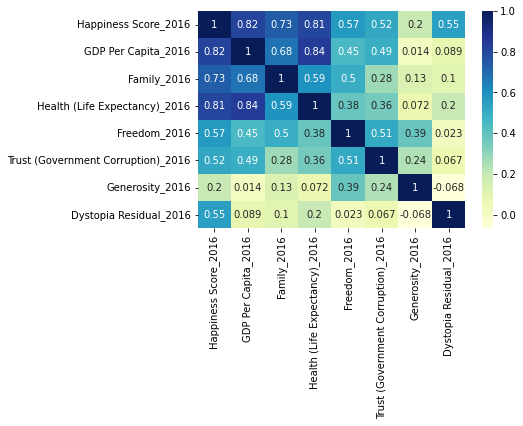

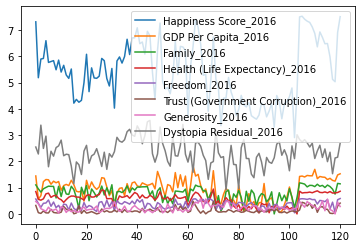

In [406]:
#Plotting graph
import seaborn as sns
import matplotlib.pyplot as plt


dataplot = sns.heatmap(Data16.corr(), cmap="YlGnBu", annot=True)

Data16.plot(kind='line')

plt.show()

In [407]:
#Read dataset

Data17 = BigData.copy(deep=True)

# Remove all columns between column index 1 to 3
Data17.drop(Data17.iloc[:, 0:22], inplace = True, axis = 1)
Data17.drop(Data17.iloc[:, 8: ], inplace = True, axis = 1)
#print(Data17)



X = Data17.copy(deep=True)
y = Data17.copy(deep=True)

X.drop(X.iloc[:,0:1], inplace = True, axis = 1)
y.drop(y.iloc[:, 1:8], inplace = True, axis = 1)
#print(y)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 


    
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)


r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9999999349168878
intercept: [0.00017497]
slope: [[1.00005032 0.99982141 1.00005002 0.99995779 0.99935947 1.00002573
  1.00001896]]
predicted response:
[[6.63534804]
 [4.73466756]
 [6.60882841]
 [6.64790781]
 [5.91984965]
 [6.99251985]
 [3.7938823 ]
 [5.27906695]
 [7.0790976 ]
 [7.28349002]
 [4.09554369]
 [6.37432957]
 [5.82187365]
 [6.59861055]
 [4.46549709]
 [5.22740399]
 [6.86262531]
 [7.2839002 ]
 [4.53481918]
 [7.50363886]
 [6.4243633 ]
 [6.57768111]
 [3.60306716]
 [6.57183796]
 [6.45389217]
 [5.23362829]
 [4.71367165]
 [6.52700154]
 [5.0104858 ]
 [3.8745497 ]
 [5.18247933]
 [4.55259634]
 [5.85031135]
 [3.5327795 ]
 [5.33624057]
 [6.40303026]
 [5.49307184]
 [4.49685001]
 [6.97679003]
 [5.96303778]]


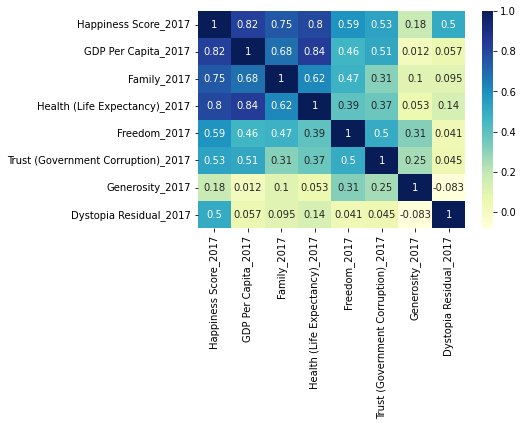

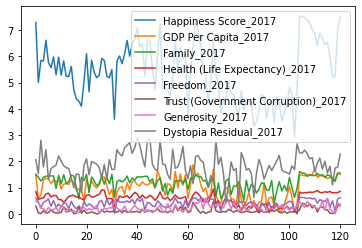

In [408]:
#Plotting graph
import seaborn as sns
import matplotlib.pyplot as plt


dataplot = sns.heatmap(Data17.corr(), cmap="YlGnBu", annot=True)

Data17.plot(kind='line')

plt.show()

In [409]:
#Read dataset

Data18 = BigData.copy(deep=True)

# Remove all columns between column index 1 to 3
Data18.drop(Data18.iloc[:, 0:31], inplace = True, axis = 1)
Data18.drop(Data18.iloc[:, 8: ], inplace = True, axis = 1)

#print(Data18)


X = Data18.copy(deep=True)
y = Data18.copy(deep=True)

X.drop(X.iloc[:,0:1], inplace = True, axis = 1)
y.drop(y.iloc[:, 1:8], inplace = True, axis = 1)
#print(y)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 


    
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)


r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9106422002425297
intercept: [0.42012068]
slope: [[0.96334386 1.11216672 0.73087571 1.1258568  1.28520108 1.06917897
  0.82110448]]
predicted response:
[[6.63224781]
 [4.53789596]
 [6.52277722]
 [6.75450871]
 [6.00871398]
 [6.88127705]
 [3.35150193]
 [5.5372621 ]
 [6.92751299]
 [7.28102393]
 [4.42931301]
 [6.15619144]
 [5.51938286]
 [6.51529602]
 [4.28084785]
 [5.01662697]
 [6.8649242 ]
 [7.21592358]
 [4.37271574]
 [7.40469413]
 [6.34319463]
 [6.50082639]
 [3.865267  ]
 [6.80280389]
 [6.39363636]
 [5.29985474]
 [4.55968641]
 [6.46432193]
 [5.29399635]
 [4.4944276 ]
 [5.14018008]
 [4.74643681]
 [5.48168504]
 [4.05101569]
 [5.29853415]
 [6.32158353]
 [5.65765046]
 [4.68612056]
 [7.00148775]
 [5.8460253 ]]


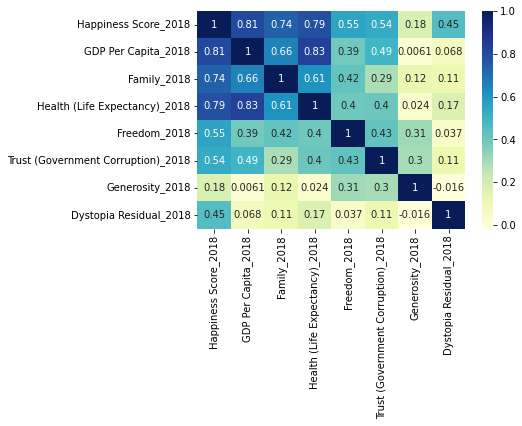

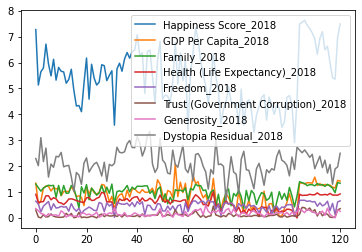

In [410]:
#Plotting graph
import seaborn as sns
import matplotlib.pyplot as plt


dataplot = sns.heatmap(Data18.corr(), cmap="YlGnBu", annot=True)

Data18.plot(kind='line')


plt.show()

In [411]:
#Read dataset

Data19 = BigData.copy(deep=True)

# Remove all columns between column index 1 to 3
Data19.drop(Data19.iloc[:, 0:40], inplace = True, axis = 1)
#Data19.drop(Data19.iloc[:, 8: ], inplace = True, axis = 1)

#print(Data19)




X = Data19.copy(deep=True)
y = Data19.copy(deep=True)

X.drop(X.iloc[:,0:1], inplace = True, axis = 1)
y.drop(y.iloc[:, 1:8], inplace = True, axis = 1)
#print(y)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 


    
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)


r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8721748615528401
intercept: [0.59990034]
slope: [[0.96413321 0.95269986 0.78556924 1.10942676 1.93735661 1.16118347
  0.7568845 ]]
predicted response:
[[6.49432533]
 [4.51335049]
 [6.37635456]
 [6.61719101]
 [5.9956865 ]
 [6.80571727]
 [3.3452015 ]
 [5.6470711 ]
 [6.86560908]
 [7.39356985]
 [4.53242259]
 [6.20995124]
 [5.5913814 ]
 [6.39791892]
 [4.38806529]
 [5.02487677]
 [6.98567712]
 [7.28330639]
 [4.36891986]
 [7.34631856]
 [6.28861816]
 [6.44004801]
 [4.11774079]
 [7.1358284 ]
 [6.36951057]
 [5.42057743]
 [4.60993007]
 [6.5377683 ]
 [5.34542491]
 [4.57562805]
 [5.18766828]
 [4.80357468]
 [5.45143234]
 [4.13709284]
 [5.33520775]
 [6.29561896]
 [5.74203004]
 [4.71078691]
 [7.13853976]
 [5.81395242]]


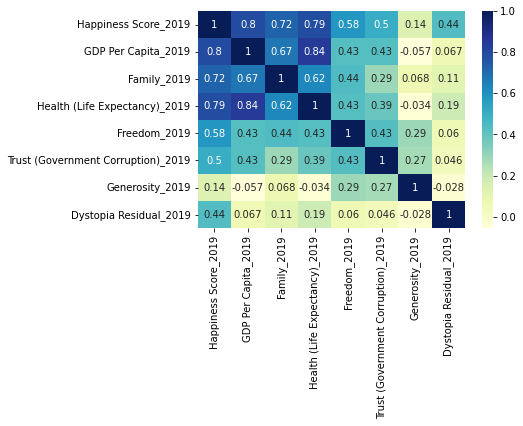

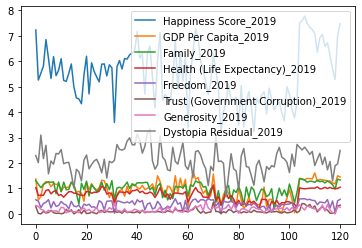

In [412]:
#Plotting graph
import seaborn as sns
import matplotlib.pyplot as plt


dataplot = sns.heatmap(Data19.corr(), cmap="YlGnBu", annot=True)

Data19.plot(kind='line')

plt.show()